In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [3]:
ten_important = ['Bankrupt?', 'Debt ratio %', 'Net worth/Assets', 'Current Liability to Assets', 
                 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 
                 'ROA(C) before interest and depreciation before interest', 'Cash/Total Assets', 
                 'Working Capital to Total Assets', 'Net Income to Total Assets', 'Total Asset Turnover', 
                 'Fixed Assets Turnover Frequency', 'Tax rate (A)', 'Persistent EPS in the Last Four Seasons', 
                 'Current Liability to Current Assets', 'CFO to Assets', 'Cash/Current Liability', 
                 'Per Share Net profit before tax (Yuan ¥)', 'Net profit before tax/Paid-in capital', 
                 'Retained Earnings to Total Assets', 'Net Value Per Share (A)']
importances = [3.0019988841642453, 3.0019313398800773, 2.2517141711031403, 2.1874310630160694, 2.1029822856455738, 
               1.9993559005084032, 1.8370079940532245, 1.833941417634605, 1.5798176623854632, 1.380990091610932, 
               1.3383669834513077, 1.273982195027221, 1.0859730073303693, 1.000362127219292, 0.9775036978289448, 
               0.9350283397694856, 0.9338787138767904, 0.8933059525075357, 0.8115846477434895, 0.7639251335942944]

feat_importances = pd.Series(importances, index=ten_important[1:])

score_test = {'0': {'precision': 0.8703703703703703, 'recall': 0.8103448275862069, 'f1-score': 0.8392857142857144, 
                    'support': 58}, '1': {'precision': 0.7555555555555555, 'recall': 0.8292682926829268, 
                                          'f1-score': 0.7906976744186047, 'support': 41}, 'accuracy': 0.8181818181818182, 
              'macro avg': {'precision': 0.8129629629629629, 'recall': 0.8198065601345668, 'f1-score': 0.8149916943521596, 
                            'support': 99}, 'weighted avg': {'precision': 0.8228208005985783, 'recall': 0.8181818181818182,
                                                             'f1-score': 0.8191633947447902, 'support': 99}}
conf_test = np.array([[47, 11],[7, 34]])

score = {'0.0': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 5}, 
         '1.0': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 5}, 
         'accuracy': 0.8, 'macro avg': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 10}, 
         'weighted avg': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 10}}

conf = np.array([[4, 1],[1, 4]])

df_raw_export = pd.read_csv("data/raw_export_logr.csv")
df_cleaned_export = pd.read_csv("data/cleaned_export_logr.csv")

# <center>Bankrupt dataset visualisation deployment</center>
## <center>Logistic Regression</center>

<center>D.Broughton</center>
<center>25385208</center>

---
---

## 1. Data understanding and preparation
### 1.1. Feature distributions before and after cleaning

>Choose a feature from the dropdown menu. 

In [4]:
def f(x):
    fig1, ax1 = plt.subplots(2,1,figsize=(9*1.618, 9))
    fig1.tight_layout(pad=7.0)
    fig1.suptitle('{} density plot separated by the Bankruptcy'.format(x), fontsize = 20)
    sns.kdeplot(df_raw_export[df_raw_export['Bankrupt?'] == 0][x], color = 'b', shade = True, Label = "0", linewidth = 0.6, ax=ax1[0])
    sns.kdeplot(df_raw_export[df_raw_export['Bankrupt?'] == 1][x], color = 'r', shade = True, Label = "1", linewidth = 0.6, ax=ax1[0])
    ax1[0].set_title('Before cleaning', fontsize = 18)
    ax1[0].set_ylabel('Density', fontsize = 16)
    ax1[0].set_xlabel('')
    ax1[0].legend(title = 'Bankrupt')
    sns.kdeplot(df_cleaned_export[df_cleaned_export['Bankrupt?'] == 0][x], color = 'b', shade = True, Label = "0", linewidth = 0.6, ax=ax1[1])
    sns.kdeplot(df_cleaned_export[df_cleaned_export['Bankrupt?'] == 1][x], color = 'r', shade = True, Label = "1", linewidth = 0.6, ax=ax1[1])
    ax1[1].set_title('After cleaning', fontsize = 18)
    ax1[1].set_ylabel('Density', fontsize = 16)
    ax1[1].set_xlabel('')
    ax1[1].legend(title = 'Bankrupt')
    return None

Feature_select = interact(f, x=widgets.Dropdown(options=sorted(ten_important[1:]), description='Feature:'));

interactive(children=(Dropdown(description='Feature:', options=('CFO to Assets', 'Cash/Current Liability', 'Ca…

---
### 1.2. Scatter plot of cleaned features

>Hold Ctrl and select **three** features to display scatterplot.

>The following describes each selection in order: (1) x-axis feature, (2) y-axis feature, and (3) sizing feature.

>To restart selection process click any feature without holding Ctrl.

In [5]:
def f(x):
    if len(x) > 0:
        x = list(x)
        print("x-axis: ", x[0])
    if len(x) == 2:
        print("y-axis: ", x[1])
    if len(x) == 3:
        print("y-axis: ", x[1])
        print("Size: ", x[2])
        print('')
    if len(x) == 3:
        plt.figure(figsize=(10,8))
        plt.title("Scatter plot of {} (x), {} (y),\n and {} (size) separated by Bankraupt.".format(x[0],x[1],x[2]), fontsize = 20)
        sns.scatterplot(data = df_cleaned_export, x = x[0], y = x[1], hue = 'Bankrupt?', size = x[2], sizes=(100, 600), palette="seismic")
        plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., markerscale = 0.5, fontsize = 12)
        plt.xlabel(x[0], fontsize = 16)
        plt.ylabel(x[1], fontsize = 16)
    return None

inter = interact(f, x=widgets.SelectMultiple(options = sorted(ten_important[1:]), rows =5, value = [sorted(ten_important[1:])[0]],
                                     description='Features: ', disabled=False))

interactive(children=(SelectMultiple(description='Features: ', index=(0,), options=('CFO to Assets', 'Cash/Cur…

---
---
## 2. Logistic regression results
### 2.1. Coefficients as a measure of feature importance

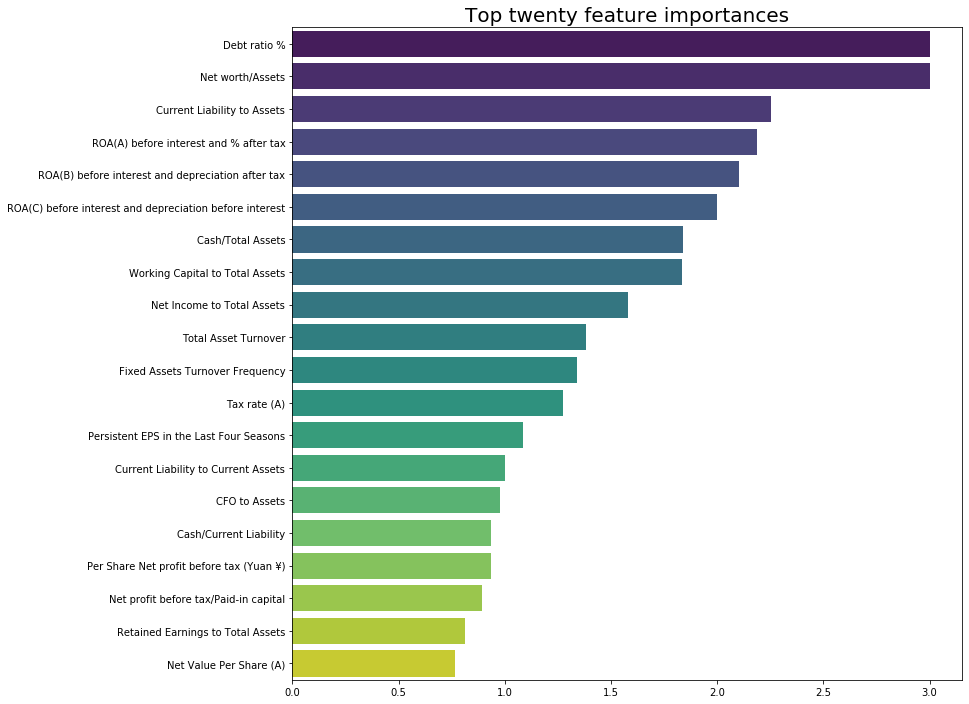

In [6]:
plt.figure(figsize=(12, 12))
plt.title("Top twenty feature importances", fontsize = 20)
sns.barplot(x=feat_importances.values[0:20], y = feat_importances.index.to_list()[0:20], palette="viridis")
plt.show()

---
### 2.2. Confusion matrices

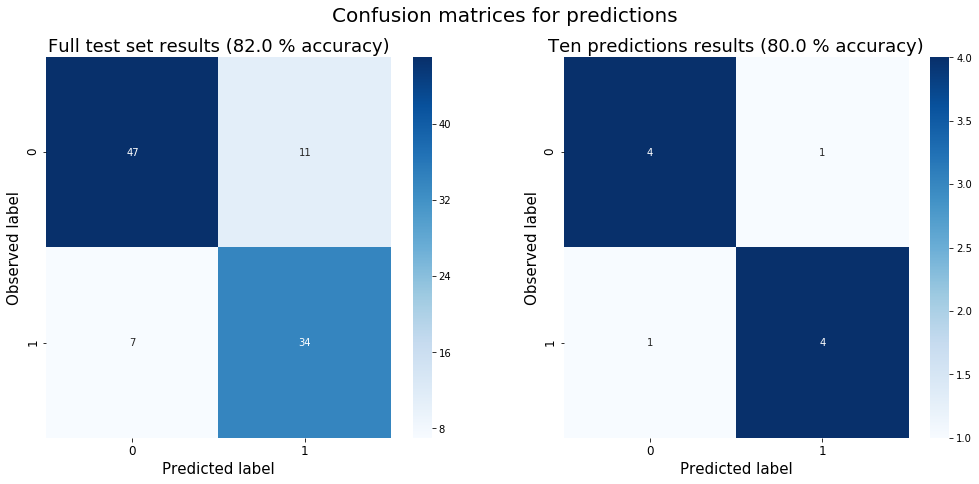

In [7]:
fig, ax = plt.subplots(1,2,figsize=(17,7))
fig.suptitle('Confusion matrices for predictions', fontsize = 20)
sns.heatmap(conf_test, annot=True, ax=ax[0], cmap = "Blues")
ax[0].set_title('Full test set results ({} % accuracy)'.format(str(round(score_test['accuracy'], 2)*100)), fontsize = 18)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_xlabel('Predicted label', fontdict={'size':'15'})
ax[0].set_ylabel('Observed label', fontdict={'size':'15'})
sns.heatmap(conf, annot=True, ax=ax[1], cmap = "Blues")
ax[1].set_title('Ten predictions results ({} % accuracy)'.format(str(round(score['accuracy'], 2)*100)), fontsize = 18)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_xlabel('Predicted label', fontdict={'size':'15'})
ax[1].set_ylabel('Observed label', fontdict={'size':'15'})
plt.show()